In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm

In [2]:
src_dir = os.path.abspath("../")
data_dir = os.path.abspath("../../data")
sys.path.append(src_dir)
from dataset import InjectionMoldingDataset

In [3]:
CONNECTION_RANGE = 0.003
TIME_STEP_SIZE = 1

dataset = InjectionMoldingDataset(
    data_dir,
    CONNECTION_RANGE,
    TIME_STEP_SIZE,
    skip_processing=False
)
# Length of the dataset
print(f"Number of graphs: {len(dataset)}")

Processing...


Clearing processed_dir..
Finished clearing!


process studies: 100%|██████████| 50/50 [02:37<00:00,  3.15s/it]

Number of graphs: 300



Done!


In [71]:
def plot_graph_fill_difference(graph):
    mask_t0 = graph.x.T[0].bool().view(-1, 1).expand(-1, 3) #masks filled nodes
    filled_nodes_t0 = torch.masked_select(graph.pos, mask_t0).view(-1, 3)

    mask_t1 = graph.y.T[0].bool().view(-1, 1).expand(-1, 3) #masks filled nodes
    filled_nodes_t1 = torch.masked_select(graph.pos, mask_t1).view(-1, 3)

    plt.figure(figsize=(12, 12))
    xs, ys, zs = filled_nodes_t1.T
    plt.scatter(xs, ys, c="blue")
    xs, ys, zs = filled_nodes_t0.T
    plt.scatter(xs, ys, c="red")
    plt.xlim(0, 0.1)
    plt.ylim(0, .1)
    plt.show()

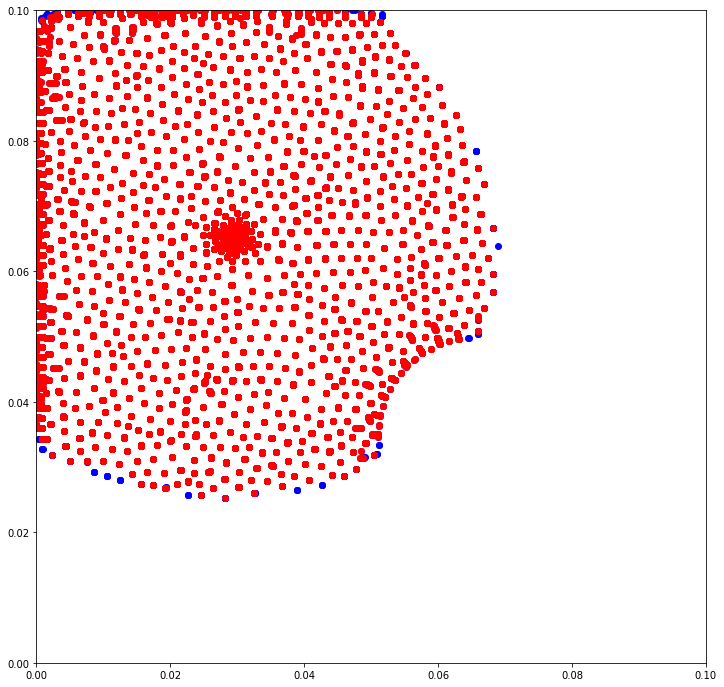

In [69]:
DATA_INDEX = 50
graph = dataset[DATA_INDEX]
plot_graph_fill_difference(graph)

In [38]:
def get_changed_nodes(graph):
    fill_state_t0 = graph.x.T[0]
    fill_state_t1 = graph.y.T[0]

    change = torch.not_equal(fill_state_t0, fill_state_t1)
    return torch.sum(change).item()

In [39]:
changed_nodes = [get_changed_nodes(g) for g in tqdm(dataset)]

100%|██████████| 5566/5566 [00:59<00:00, 92.88it/s]


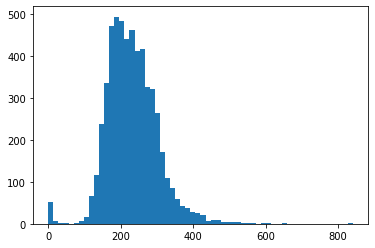

In [40]:
plt.figure()
plt.hist(changed_nodes, bins=60)
plt.show()

In [65]:
def plot_graph(graph):
    xs, ys, zs = graph.pos.T
    fill_state_t0 = graph.x.T[0]
    count_t0 = torch.sum(fill_state_t0).int().item()
    fill_state_t1 = graph.y.T[0]
    count_t1 = torch.sum(fill_state_t1).int().item()

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    ax_left, ax_right = axes

    ax_left.scatter(xs, ys, c=fill_state_t0, cmap="hot_r")
    ax_left.set_title(f"t0: {count_t0} filled")
    ax_right.scatter(xs, ys, c=fill_state_t1, cmap="hot_r")
    ax_right.set_title(f"t1: {count_t1} nodes filled")
    plt.show()

In [52]:
def plot_study(study):
    for g in study:
        plot_graph(g)